<a href="https://colab.research.google.com/github/raulbenitez/PRML_Probabilistic_classifiers/blob/main/manual_exercise_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate data

Text(0.5, 1.0, 'Data')

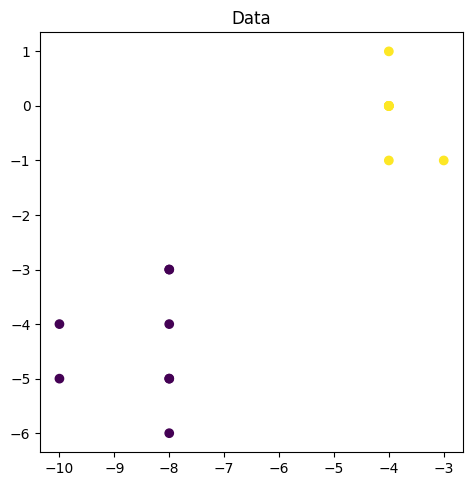

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


n_samples = 16
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)
XI = np.int16(X)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(XI[:, 0], XI[:, 1], c=y)
plt.title("Data")

Observations of class 0

In [14]:
XI[y==0]

array([[ -8,  -3],
       [-10,  -4],
       [ -8,  -5],
       [-10,  -5],
       [ -8,  -3],
       [ -8,  -6],
       [ -8,  -5],
       [ -8,  -4]], dtype=int16)

split train and test

In [37]:
from sklearn.model_selection import train_test_split
# split the data with 70% in each set
Xtrain, Xtest, ytrain, ytest = train_test_split(XI, y, random_state=0,train_size=0.7)

In [38]:
Xtrain[ytrain==0] # train samples of class 0

array([[-10,  -4],
       [ -8,  -5],
       [ -8,  -3],
       [-10,  -5],
       [ -8,  -4],
       [ -8,  -3]], dtype=int16)

Fit a kNN classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)
y_test_pred = model.predict(Xtest)

In [40]:
y_test_pred

array([1, 0, 1, 1, 0])

In [41]:
ytest

array([1, 0, 1, 1, 0])

In [27]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytest, y_test_pred) #  CM[i,j] is equal to the number of observations of class i and predicted to be in class j

In [25]:
print(CM)

[[2 0]
 [0 3]]


In [33]:
TN = CM[0,0] # True Negatives (0 class correctly predicted as 0)
TP = CM[1,1] # True Positives (1 class correctly predicted as 1)
FP = CM[0,1] # False Positives (0 class mistakenly predicted as 1)
FN = CM[1,0] # False Negatives (1 class mistakenly predicted as 0)

In [48]:
Xtest[ytest==0] # test samples of class 0

array([[-8, -5],
       [-8, -6]], dtype=int16)

In [49]:
Xtest[y_test_pred==0] # test samples predicted as class 0

array([[-8, -5],
       [-8, -6]], dtype=int16)

Typical performance measures

In [50]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Recall = TP/(TP+FN)
Precision = TP/(TP+FP)
Fscore = (2*Recall*Precision)/(Recall+Precision)
print([Accuracy, Recall, Precision, Fscore])

[1.0, 1.0, 1.0, 1.0]


Fit linear and quadratic discriminant model

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
import numpy as np

LDA = LinearDiscriminantAnalysis(store_covariance=True)
LDA.fit(Xtrain, ytrain)
QDA = QuadraticDiscriminantAnalysis(store_covariance=True)
QDA.fit(Xtrain, ytrain)

y_test_pred_LDA = LDA.predict(Xtest)
y_test_pred_QDA = QDA.predict(Xtest)

In [56]:
LDA.means_

array([[-8.66666667, -4.        ],
       [-3.8       ,  0.        ]])

In [75]:
np.mean(Xtrain[ytrain==0],axis=0)

array([-8.66666667, -4.        ])

In [76]:
np.mean(Xtrain[ytrain==1],axis=0)

array([-3.8,  0. ])

In [83]:
LDA.covariance_

array([[0.55757576, 0.09090909],
       [0.09090909, 0.54545455]])

In [94]:
from sklearn.preprocessing import StandardScaler
XStrain = StandardScaler().fit_transform(Xtrain)
np.cov(Xtrain.T,bias=True)

array([[6.42975207, 4.91735537],
       [4.91735537, 4.51239669]])

In [60]:
QDA.means_

array([[-8.66666667, -4.        ],
       [-3.8       ,  0.        ]])

In [61]:
QDA.covariance_

[array([[1.06666667, 0.4       ],
        [0.4       , 0.8       ]]),
 array([[ 0.2 , -0.25],
        [-0.25,  0.5 ]])]

Get posterior probabilities

In [66]:
LDA.predict_proba(Xtest)

array([[4.36617409e-11, 1.00000000e+00],
       [1.00000000e+00, 4.15419453e-12],
       [6.12788686e-09, 9.99999994e-01],
       [4.36617409e-11, 1.00000000e+00],
       [1.00000000e+00, 2.95989757e-14]])

In [67]:
y_test_pred_LDA

array([1, 0, 1, 1, 0])